# **CROP PREDICTION**

# **IMPORTING LIBRARIES**

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **READING DATA FILE**

In [118]:
df=pd.read_csv("indiancrop_dataset.csv")
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


# **DATA PREPROCESSING**

In [120]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [121]:
df.nunique()

N_SOIL          137
P_SOIL          117
K_SOIL           73
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
STATE            26
CROP_PRICE      502
CROP             22
dtype: int64

In [122]:
df.CROP.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [123]:
df.drop(['STATE'],axis=1,inplace=True)

In [124]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Coffee


# **SKEWNESS**

In [125]:
# df.P_SOIL=np.log(df['P_SOIL'])

In [126]:
# df.K_SOIL=np.log(df['K_SOIL'])

In [127]:
# df['HUMIDITY']=np.log(df['HUMIDITY'])

In [128]:
# iq1=df['CROP_PRICE'].quantile(0.25)
# iq2=df['CROP_PRICE'].quantile(0.75)
# df['CROP_PRICE']=np.where(df['CROP_PRICE']<iq1,iq1,df['CROP_PRICE'])
# df['CROP_PRICE']=np.where(df['CROP_PRICE']>iq2,iq2,df['CROP_PRICE'])

In [129]:
# iq2

In [130]:
# df['CROP_PRICE']=np.where(df['CROP_PRICE']<iq1,iq1,df['CROP_PRICE'])
# df['CROP_PRICE']=np.where(df['CROP_PRICE']>iq2,iq2,df['CROP_PRICE'])

# **ENCODING CATEGORICAL INTO NUMERICAL**

In [131]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CROP']=le.fit_transform(df['CROP'])


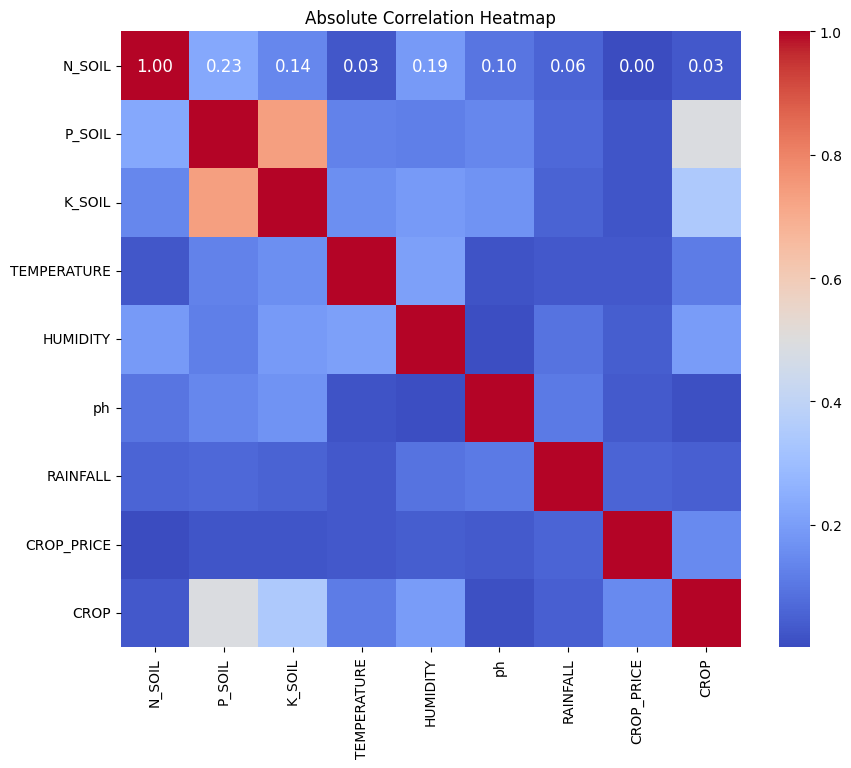

In [132]:
corr = df.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Absolute Correlation Heatmap')
plt.show()

# **SPLITING OF FEATURES**

In [133]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
0,90,42,43,20.879744,82.002744,6.502985,202.935536,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,120000


In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.04330173,
         1.8103605 ,  1.16208411],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.73487256,
         2.24205791,  0.62293049],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  1.77151047,
         2.92106603,  1.16208411],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.13812031,
         1.27141766, -0.57399054],
       [ 1.80032743, -0.64777967, -0.27942519, ...,  0.37390383,
         0.43154519, -0.32058834],
       [ 1.44810927, -1.07230015, -0.35841972, ...,  0.40109573,
         0.68200518, -0.34754602]])

In [135]:
y.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

###Training a model

**TRAIN-TEST-SPLIT**

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [137]:
print("Training data",x_train.shape)

Training data (1760, 8)


In [138]:
print("Training data",x_test.shape)

Training data (440, 8)


# **IMPORTING ALGORITHM**

**NAIVE BAYES**

In [139]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

In [140]:
model.fit(x_train,y_train)

GaussianNB()

**PREDICTION OF CROP**

In [141]:
y_prediction=model.predict(x_test)

# **MODEL METRICS**

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.990909090909091

# **CONFUSION MATRIX**

<Axes: >

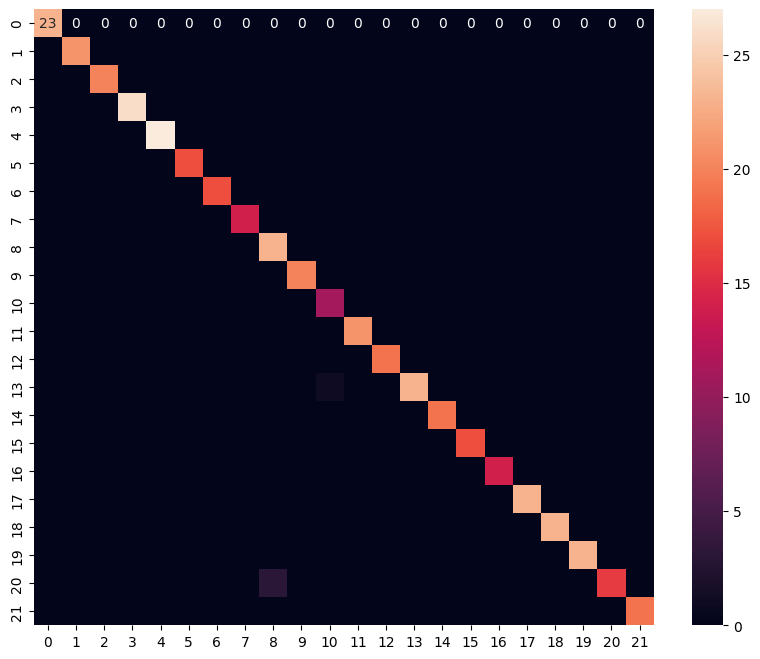

In [148]:
plt.figure(figsize=(10, 8))
from sklearn.metrics import confusion_matrix
cm_Sig = confusion_matrix(y_test, y_prediction)
sns.heatmap(cm_Sig, annot=True,fmt="d")

# **SAVING THE MODEL**

In [144]:
import pickle

In [145]:
filename='trained_model.pkl'
pickle.dump(model,open(filename,'wb'))